In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
import csv

In [5]:
def convert_to_csv(input_file, output_file):

    # Define the header (based on your data format)
    header = ["iX", "iY", "iZ", "dose", "total_val_squared", "entry"]

    with open(input_file, 'r') as infile, open(output_file, 'w', newline='') as outfile:
        writer = csv.writer(outfile)

        # Write the header row
        writer.writerow(header)

        for line in infile:
            # Skip comments and empty lines
            if line.startswith('#') or line.strip() == '':
                continue

            # Parse and clean the line
            values = [v.strip() for v in line.strip().split(',')]
            writer.writerow(values)


In [6]:
input_file = 'build/dDeposit.txt'
output_file = 'dDeposit.csv'
convert_to_csv(input_file, output_file)

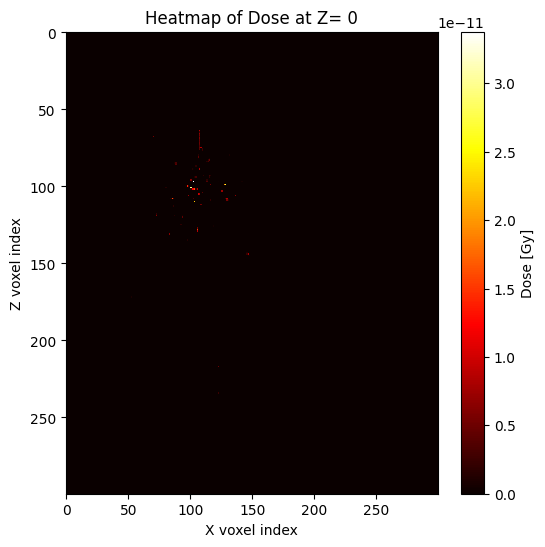

In [9]:

# Load the data
df = pd.read_csv("dDeposit.csv")

# Choose a Y slice to visualize, e.g., y = 0
z_slice = 0
df_slice = df[df['iZ'] == z_slice]

# Create pivot table for heatmap (e.g., X vs Z dose values)
heatmap_data = df_slice.pivot(index='iX', columns='iY', values='dose')

# Sort the index if necessary (Z-axis is usually vertical in heatmaps)
heatmap_data = heatmap_data.sort_index(ascending=False)

# Plotting
plt.figure(figsize=(6, 6))
plt.imshow(heatmap_data, cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar(label='Dose [Gy]')
plt.title(f'Heatmap of Dose at Z= {z_slice}')
plt.xlabel('X voxel index')
plt.ylabel('Z voxel index')
plt.show()
